In [1]:
import numpy as np
import random
from math import exp
from math import log
import matplotlib.pyplot as plt

In [2]:
dataset_name = 'Automotive'
dataset = np.load('../data/'+dataset_name+'Partitioned.npy')
[user_train,user_validation,user_test, usernum,itemnum] = dataset

In [3]:
item_successor = [[] for it in range(itemnum)]
for user in user_train:
    for i in range(len(user_train[user])-1):
        pre = user_train[user][i]
        suc = user_train[user][i+1]
        item_successor[pre].append(suc)

In [4]:
num_relation = sum([len(item_successor[item]) for item in range(itemnum)])

In [5]:
def sigmoid(x):
    return 1.0 / (1 + exp(-x))

def findUser():
    while 1:
        user = random.randint(0,usernum-1)
        if len(user_train[user]) > 1:
            return user

def findNegSucc(pos_item):
    while 1:
        neg_item = random.randint(0,itemnum-1)
        if neg_item != pos_item:
            return neg_item

def TransPredict(user, pre, cur):
    return - beta[cur] - np.sum(np.square(H[pre,:] + r + R[user,:] - H[cur,:]))

In [6]:
def AUC():
    auc_train = 0
    auc_valid = 0
    auc_test = 0
    testnum = 0     # event num per user in AUC testing
    # max_itemid = max(item_train.keys())
    for user in user_test:
        if len(user_train[user])<2 or len(user_test[user])==0:
            continue
        testnum += 1

        train_pre_item = user_train[user][-2]
        train_item = user_train[user][-1]
        train_score = TransPredict(user, train_pre_item, train_item)          
        
        valid_pre_item = user_validation[user][0]
        valid_item = user_validation[user][1]
        valid_score = TransPredict(user, valid_pre_item, valid_item)
        
        test_pre_item = user_test[user][0]
        test_item = user_test[user][1]
        test_score = TransPredict(user, test_pre_item, test_item)
        
        
        count_train, count_valid, count_test = 0, 0, 0
        neg_num = 0
        for ind in range(100):
            itemid = random.randint(0,itemnum-1)
            if itemid not in user_train[user] and itemid not in user_test[user]:
                neg_num += 1
                
                neg_score = TransPredict(user, train_pre_item, itemid)
                if neg_score < train_score:
                    count_train += 1
                elif neg_score == valid_score:
                    count_train += 0.5
                else:
                    count_train += 0                
                
                neg_score = TransPredict(user, valid_pre_item, itemid)
                if neg_score < valid_score:
                    count_valid += 1
                elif neg_score == valid_score:
                    count_valid += 0.5
                else:
                    count_valid += 0
                
                neg_score = TransPredict(user, test_pre_item, itemid)
                if neg_score < test_score:
                    count_test += 1
                elif neg_score == test_score:
                    count_test += 0.5
                else:
                    count_test += 0
        
        auc_train += count_train*1.0 / neg_num
        auc_valid += count_valid*1.0 / neg_num
        auc_test += count_test*1.0 / neg_num
    
    auc_train = auc_train/testnum
    auc_valid = auc_valid/testnum
    auc_test = auc_test/testnum
    print("training AUC: ", auc_train)
    print("validation AUC: ", auc_valid)
    print("testing AUC: ", auc_test)
    return auc_train, auc_valid, auc_test


In [7]:
def normalization(it):
    dist = np.sqrt(np.sum(np.square(H[it,:])))
    if dist > 1:
        H[it,:] = H[it,:] / dist


In [8]:
lam = 0.05
bias_lam = 0.01
reg_lam = 0.1
K = 10
learn_rate = 0.05
max_iter = 500
r = np.zeros(K)
R = np.random.rand(usernum, K)/1 - 0.5
H = np.random.rand(itemnum, K)/1 - 0.5
beta = np.zeros(itemnum)

In [9]:
auc_rec_train = []
auc_rec_valid = []
auc_rec_test = []


iteration: 5	-35315.53299377293	-33270.849092791665
iteration: 10	-29583.01923669625	-27483.871244300706
training AUC:  0.9119706285916476
validation AUC:  0.6873541693642147
testing AUC:  0.6518693952545863
iteration: 15	-27025.37910521969	-24867.145901668897
iteration: 20	-25133.188296499527	-22922.474767219068
training AUC:  0.9340736569535666
validation AUC:  0.6899832798844555
testing AUC:  0.6541076496279609
iteration: 25	-23651.37964885846	-21397.35388683629
iteration: 30	-22570.248852736146	-20279.149640246284
training AUC:  0.9429203836973079
validation AUC:  0.6915513081949549
testing AUC:  0.655307731378708
iteration: 35	-21921.466682381673	-19599.307312216315
iteration: 40	-21333.233457917177	-18985.146159666165
training AUC:  0.9484145656475138
validation AUC:  0.6914468654047846
testing AUC:  0.6550649462734149
iteration: 45	-20730.61411293872	-18359.31963057927
iteration: 50	-20301.857308990526	-17911.989513134635
training AUC:  0.9521881806379788
validation AUC:  0.6914

iteration: 395	-16043.139466807894	-13541.469464786214
iteration: 400	-16096.410988952424	-13594.733110877813
training AUC:  0.9729130568173663
validation AUC:  0.7102296118867665
testing AUC:  0.6707631626446927
iteration: 405	-15971.750726577027	-13471.101970771193
iteration: 410	-16046.751781266721	-13544.458233457544
training AUC:  0.9732417891533499
validation AUC:  0.7107643081198007
testing AUC:  0.6712993263425785
iteration: 415	-15991.745260915557	-13489.667060204749
iteration: 420	-16004.604232250875	-13501.8360034975
training AUC:  0.9734185035260453
validation AUC:  0.711001688009112
testing AUC:  0.6717444661218298
iteration: 425	-15989.76277367147	-13487.332492269576
iteration: 430	-15965.62371024236	-13462.912165016605
training AUC:  0.9735500319200583
validation AUC:  0.7110823298813996
testing AUC:  0.6722412876321943
iteration: 435	-16010.64069163322	-13508.487347930535
iteration: 440	-15996.249678200573	-13493.46394481425
training AUC:  0.973936264728981
validation A

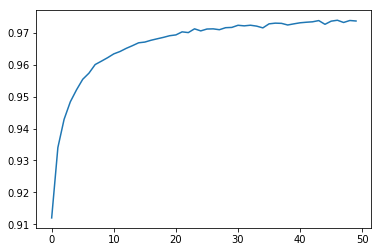

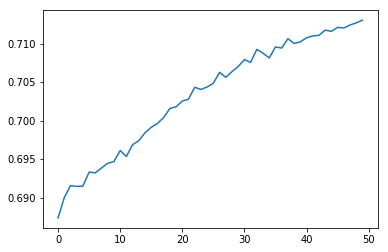

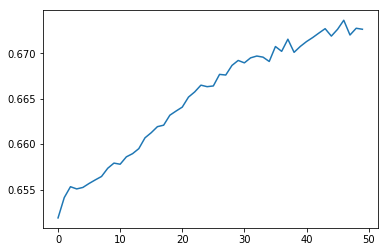

In [10]:
for it in range(max_iter):
    objective = 0
    regularization = 0
#    dg = np.zeros((itemnum, K))
#    de = np.zeros((K, itemnum))
    
    for ind in range(num_relation):
        u = findUser()
        position = random.randint(0,len(user_train[u])-2)
        p = user_train[u][position]        # previous item
        i = user_train[u][position + 1]    # positive item
        j = findNegSucc(i)                 # negative item
        
        d1 = H[p,:] + r + R[u,:] - H[i,:]
        d2 = H[p,:] + r + R[u,:] - H[j,:]
        
        z = sigmoid(-beta[i] + beta[j] - \
                    np.sum(np.square(d1)) + \
                    np.sum(np.square(d2)))
#        dg[u,:] += (1-z)*(eta[:,i]-eta[:,j])
#        de[:,i] += (1-z)*(gam[u,:])
#        de[:,j] += (1-z)*(-gam[u,:])
        beta[i] += learn_rate*(-(1-z) - 2*bias_lam*beta[i])
        beta[j] += learn_rate*((1-z) - 2*bias_lam*beta[j])
        H[p,:] += learn_rate*((1-z)*2*(d2-d1) - 2*lam*H[p,:])
        H[i,:] += learn_rate*((1-z)*2*(d1) - 2*lam*H[i,:])
        H[j,:] += learn_rate*((1-z)*2*(-d2) - 2*lam*H[j,:])
        r += learn_rate*((1-z)*2*(d2-d1) - 2*lam*r)
        R[u] = learn_rate*((1-z)*2*(d2-d1) - 2*reg_lam*R[u])
        
        normalization(p)
        normalization(i)
        normalization(j)
        
        objective += log(z)
    
#    dg -= lam*gam
#    de -= lam*eta
#    gam += learn_rate*dg
#    eta += learn_rate*de 
    
    regularization = objective - lam*np.sum(np.square(H)) - \
                                 lam*np.sum(np.square(r)) - \
                                 reg_lam*np.sum(np.square(R)) - \
                                 bias_lam*np.sum(np.square(beta))
                                                 
    if (it+1)%5 == 0:
        print('iteration: ' + str(it+1) + '\t' + str(regularization) \
                                 + '\t' + str(objective))
    if (it+1)%10 == 0:
        auc = AUC()
        auc_rec_train.append(auc[0])
        auc_rec_valid.append(auc[1])
        auc_rec_test.append(auc[2])

plt.figure()
plt.plot(auc_rec_train)
plt.figure()
plt.plot(auc_rec_valid)
plt.figure()
plt.plot(auc_rec_test)

np.save("itemVector.npy",H)
np.save("userVector.npy",R)

R = np.load("userVector.npy")

for idx in range(20):
    i = random.randint(0,usernum-1)
    j = random.randint(0,usernum-1)
    a = R[i]
    b = R[j]
    cos_angle = a.dot(b) / np.sqrt(a.dot(a) * b.dot(b))
    print(cos_angle)

In [11]:
H

array([[ 0.37000835,  0.01750508,  0.07361433, ...,  0.42279009,
        -0.10564956, -0.58017475],
       [ 0.20387075,  0.28681432,  0.33737812, ...,  0.43491451,
        -0.07666606, -0.48715035],
       [ 0.1674395 , -0.19470027, -0.22417094, ..., -0.23155372,
         0.17891263, -0.07639633],
       ...,
       [ 0.32063436, -0.06676624, -0.11465896, ..., -0.07409917,
         0.06497752, -0.00779254],
       [ 0.16215592,  0.07006112, -0.17320352, ..., -0.25328024,
         0.25888922, -0.06313673],
       [ 0.31406035, -0.31976321, -0.07113644, ..., -0.03443239,
        -0.06969706, -0.13682906]])

In [13]:
np.save("userVector.npy",R)

In [14]:
userVector = \
np.load(
    file="userVector.npy", 
)

In [15]:
userVector

array([[ 1.14592111e-03, -2.03881874e-03,  3.35119841e-03, ...,
         7.69186613e-04,  2.69612703e-03, -4.75698082e-03],
       [ 5.10732999e-03,  2.28811053e-04, -1.83605861e-03, ...,
         6.92322740e-04, -3.40109394e-04, -7.04164460e-03],
       [ 2.50267499e-03, -2.61357485e-05, -1.89781652e-04, ...,
         1.93973488e-03,  3.47676975e-04, -2.89501647e-03],
       ...,
       [ 1.78944297e-01,  2.10797410e-01,  6.41977256e-02, ...,
         2.86390629e-01,  2.84657488e-01,  6.80039416e-03],
       [ 4.25500744e-01,  6.04928804e-02,  9.57489422e-03, ...,
         7.06630170e-02, -3.37219022e-01,  3.78105497e-01],
       [-2.86624378e-01,  1.07367307e-01,  5.48551079e-02, ...,
        -3.49158812e-01,  9.94707693e-02,  4.09484787e-01]])